<a href="https://colab.research.google.com/github/yelenayeghyan/BusAnalytics/blob/main/pycodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import pandas as pd #pandas for data manipulation, transformation
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import numpy as np #for scientific computations
from scipy import stats #for t-test
import statsmodels.api as sm #statsmodels library
from statsmodels.api import qqplot #for qq plot
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  #variance equality and linearity tests
from scipy.stats import shapiro #for cheking normality

import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor #for checking Multicolinearity
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import r2_score, accuracy_score,classification_report,confusion_matrix, recall_score, roc_auc_score, roc_curve


from statsmodels.discrete.discrete_model import Logit
import statsmodels.tools as sm
from sklearn.linear_model import LogisticRegression


from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
import scikitplot as skplt #in case of error run <<!pip install scikit-plot>> and run the code again


from sklearn.preprocessing import StandardScaler
from collections import defaultdict

In [ ]:
data=pd.read_csv("default.csv")

In [ ]:
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
data.shape

(1000, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [ ]:
data.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
#checking number of duplicates, missing values and columns with a single value
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])
print("All unique valued columns:", data.columns[data.nunique()==1000])


Duplicates: 0
Missing values: 0
Single valued columns: Index([], dtype='object')
All unique valued columns: Index([], dtype='object')


In [ ]:
data.purpose.isna().sum()

0

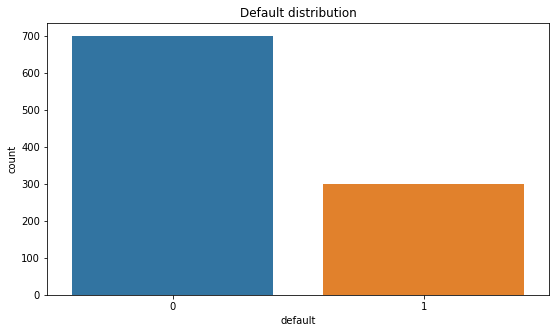

In [ ]:
#let's visualise the distribution of default
plt.figure(figsize=(9,5))
sns.countplot(data.default)
plt.title("Default distribution")
plt.show()

In [ ]:
#lets count the benchmark for deposit subscription distribution
#we have balanced data
data.default.value_counts(normalize=True).mul(100).rename("default distribution in percentage")

0    70.0
1    30.0
Name: default distribution in percentage, dtype: float64

In [ ]:
data.credit_history.mode()

0    existing credits paid back duly till now
dtype: object

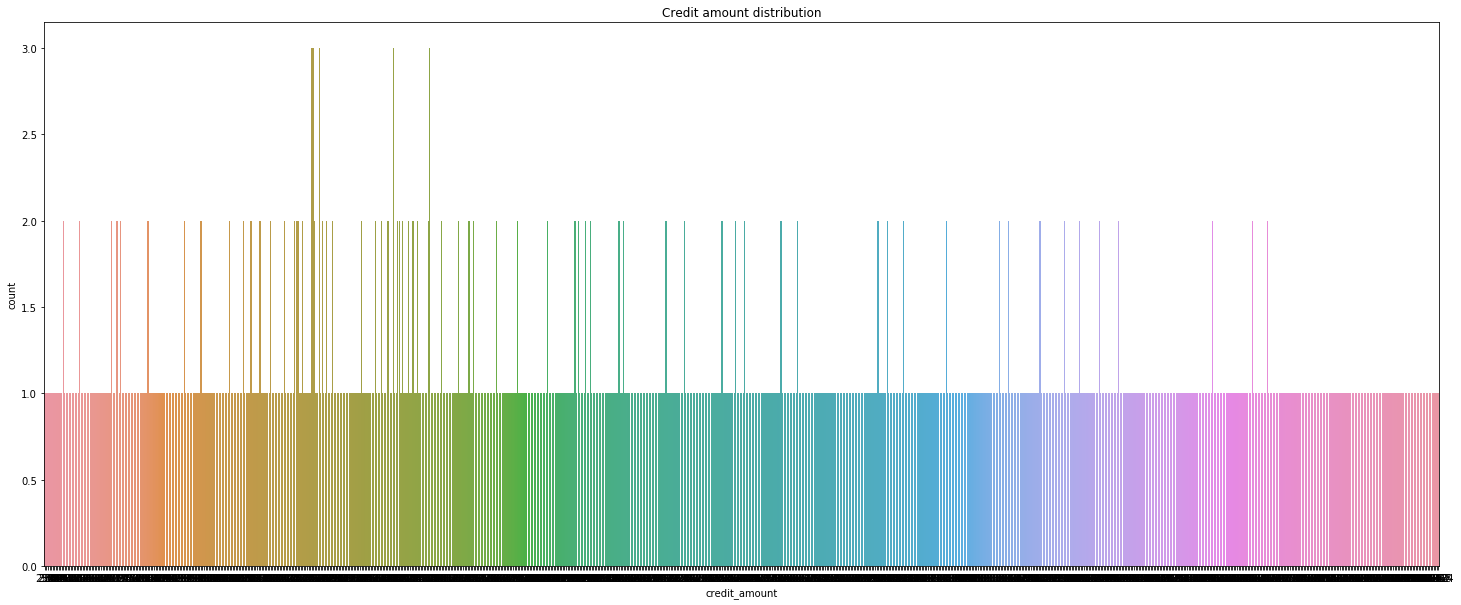

In [ ]:
#let's visualise the distribution of credit amount
plt.figure(figsize=(25,10))
sns.countplot(data.credit_amount)
plt.title("Credit amount distribution")
plt.show()

In [ ]:
data.credit_amount=np.where(data.credit_amount<2300, 0,1)

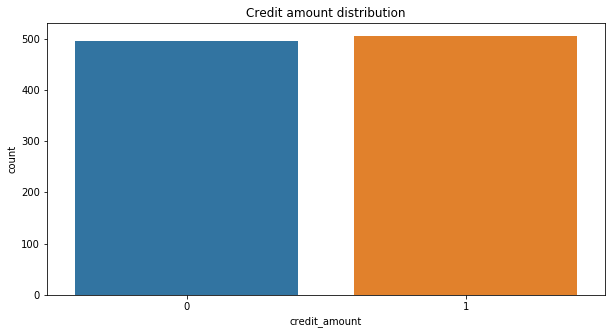

In [ ]:
#let's visualise the distribution of credit amount
plt.figure(figsize=(10,5))
sns.countplot(data.credit_amount)
plt.title("Credit amount distribution")
plt.show()

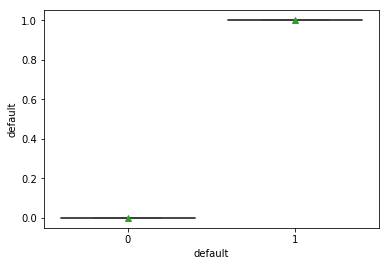

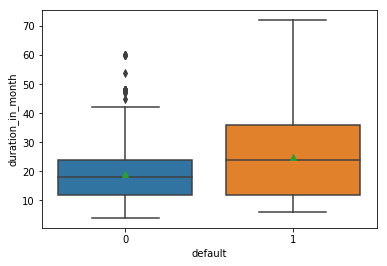

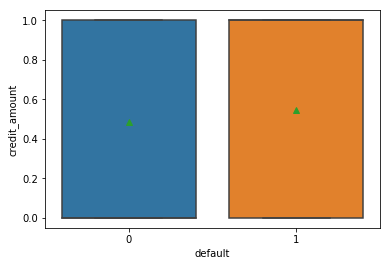

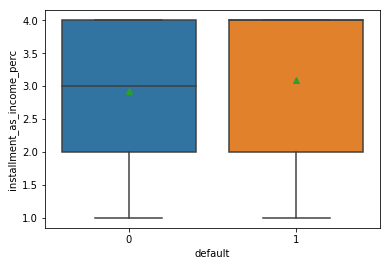

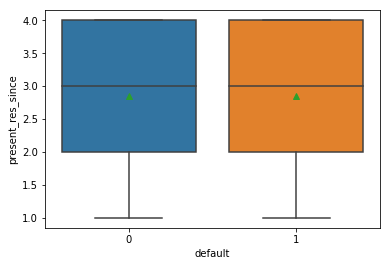

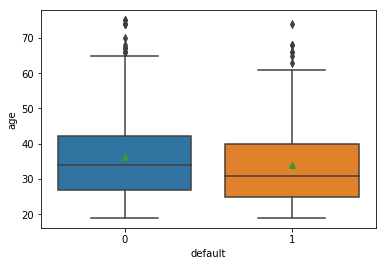

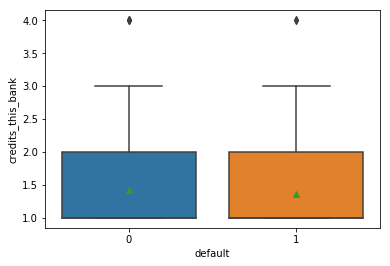

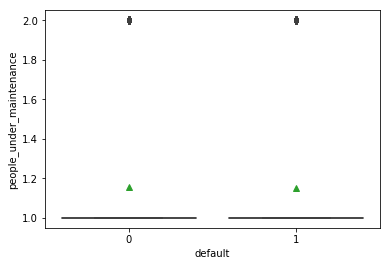

In [ ]:
for i in data.dtypes[data.dtypes!="O"].index.tolist():
    sns.boxplot(data=data,y=i,x="default", showmeans=True)
    plt.show()

In [ ]:
rates_list=[]
for i in data.dtypes[data.dtypes=="O"].index.tolist():
    rates=data.groupby(i)["default"].value_counts(normalize=True).rename("percentage").mul(100).reset_index()
    rates_list.append(rates)

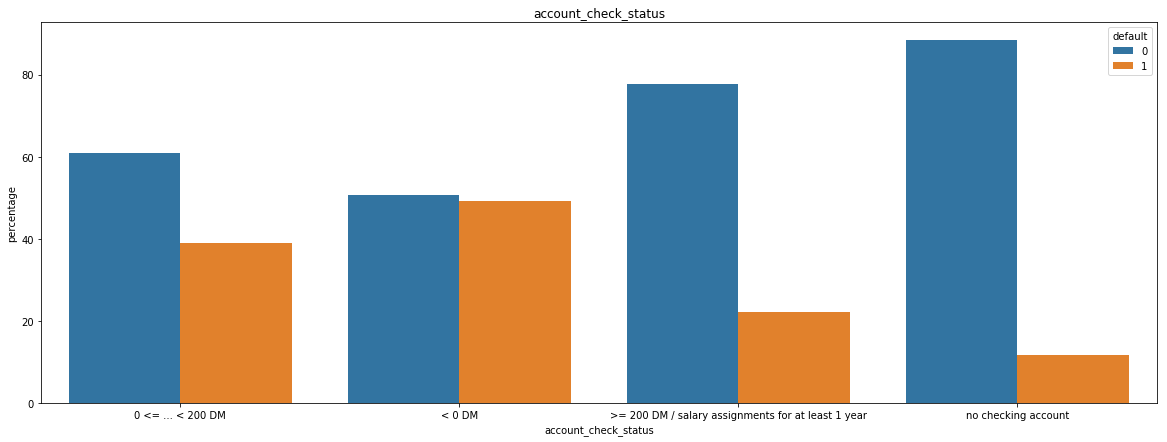

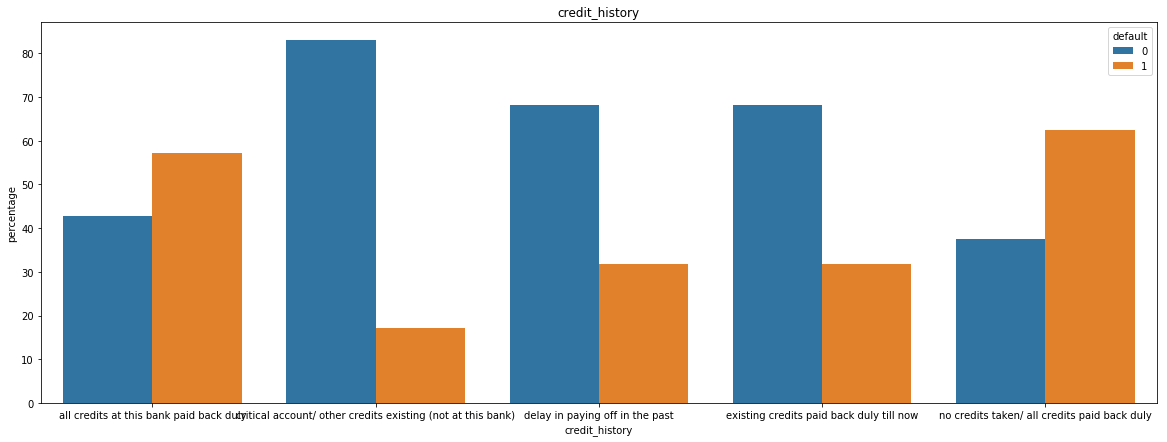

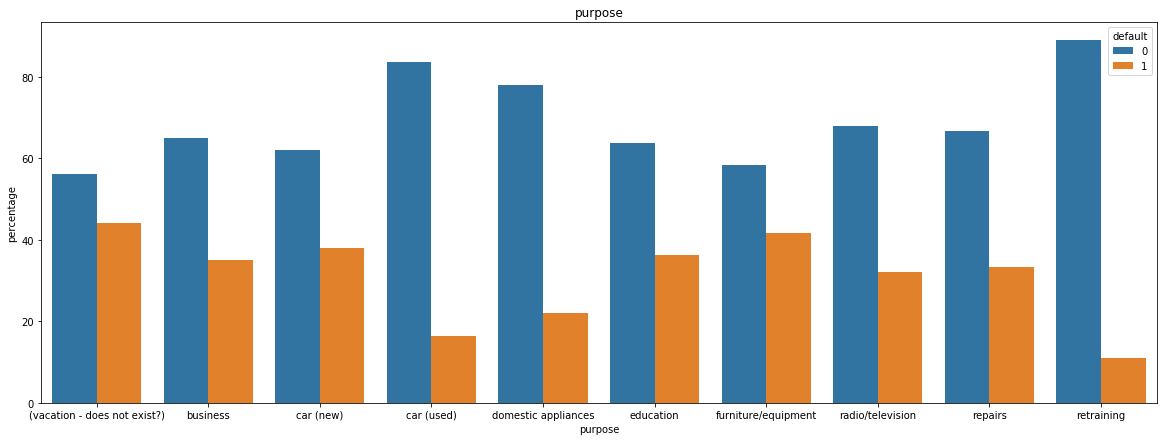

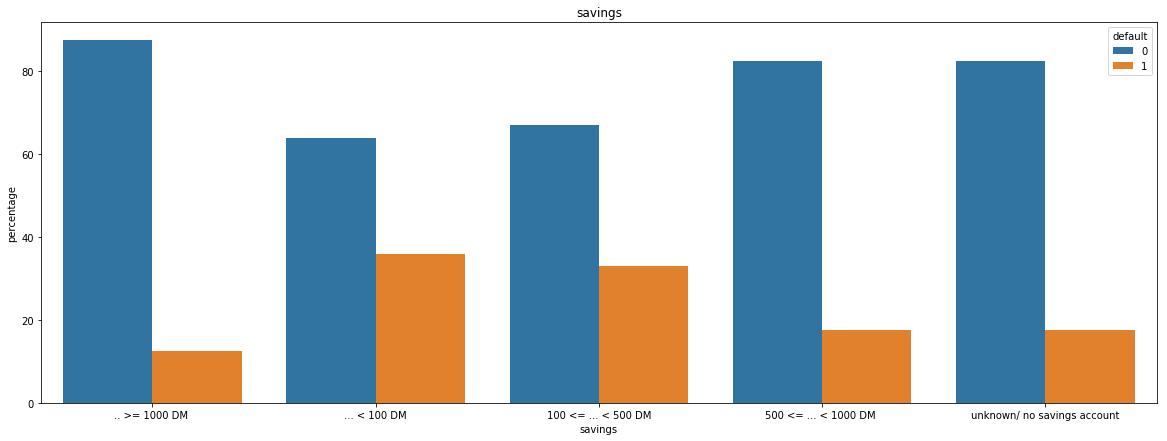

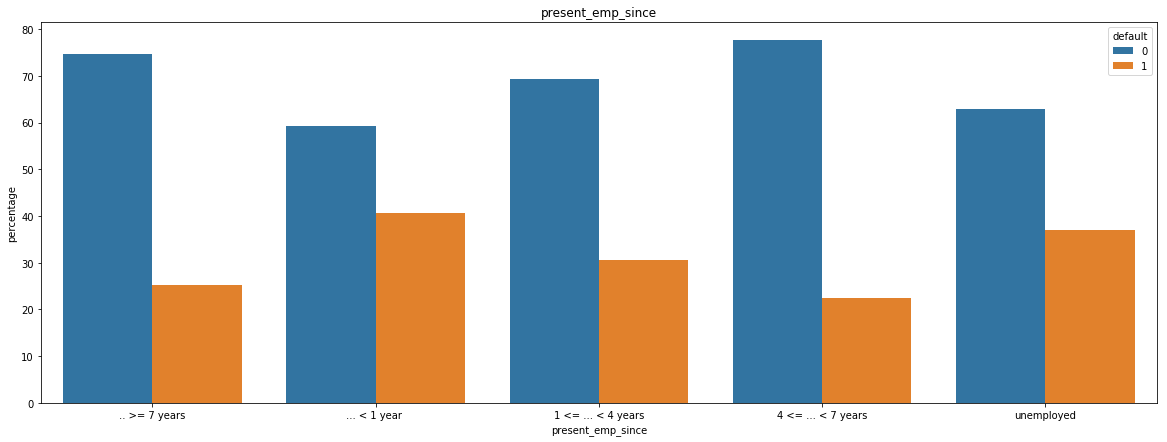

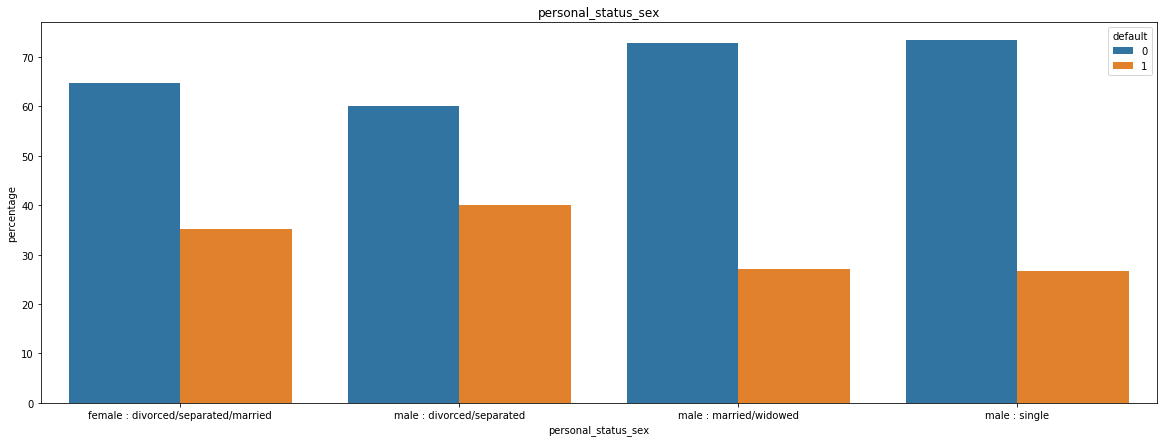

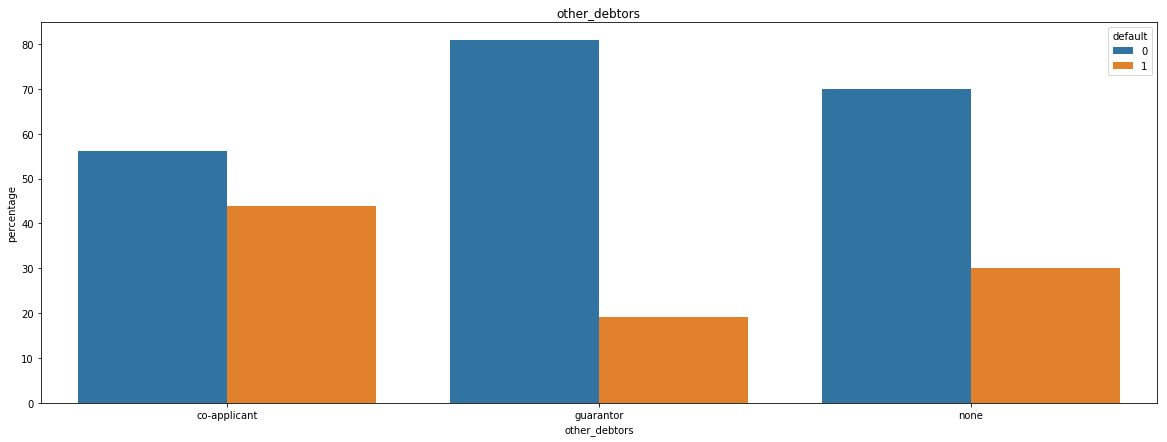

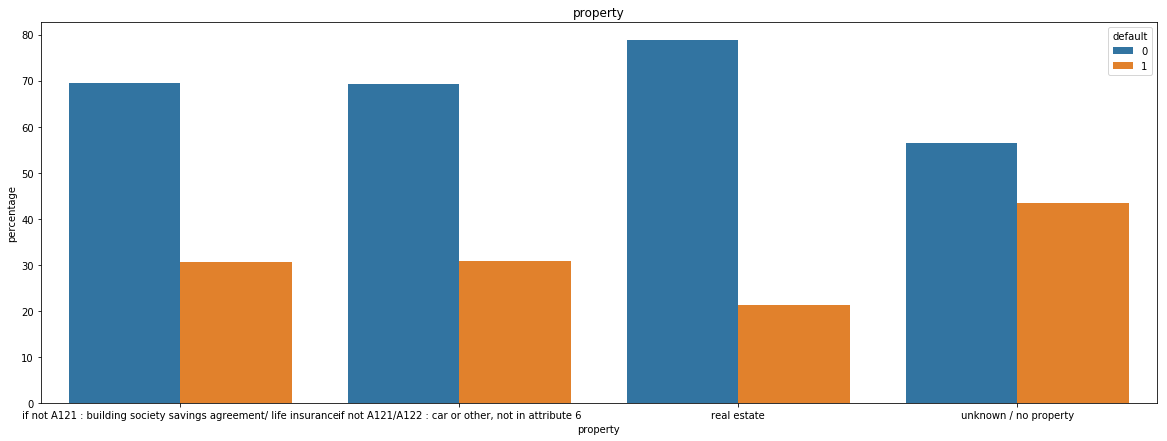

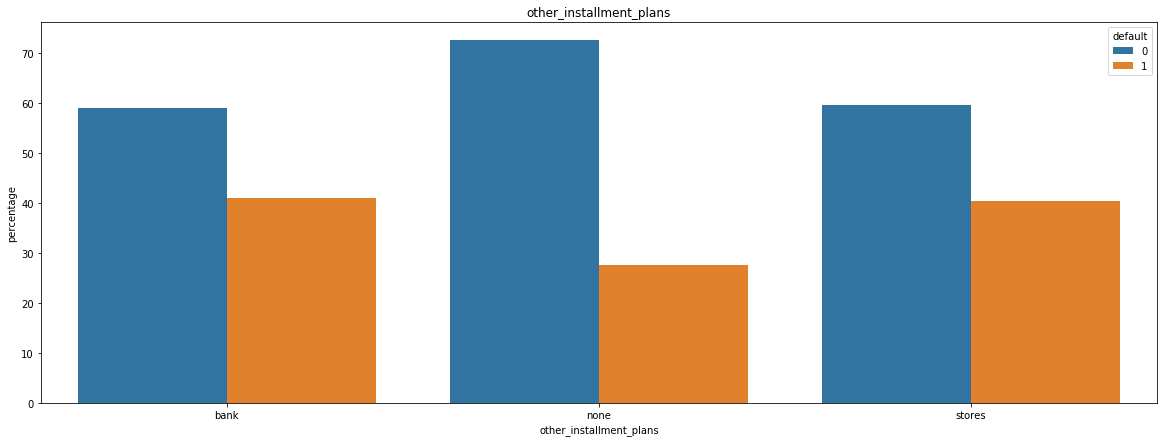

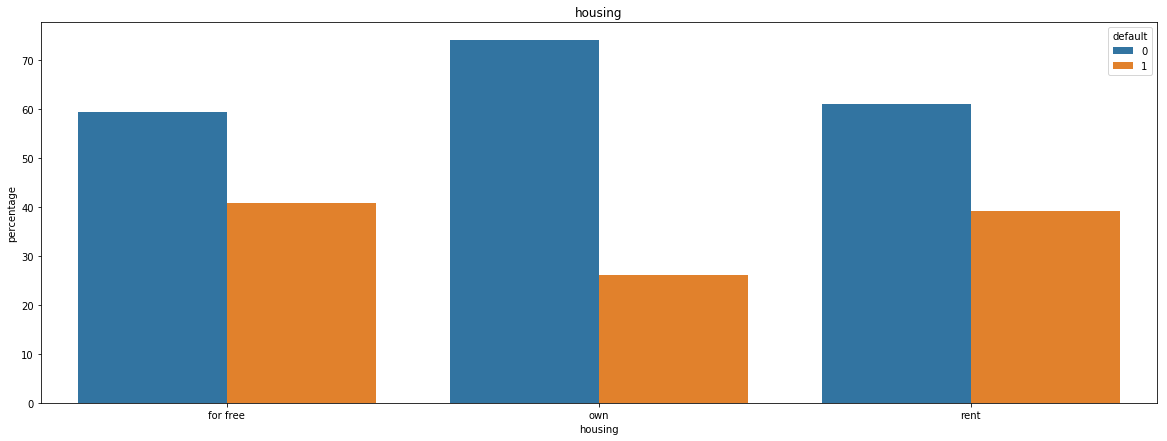

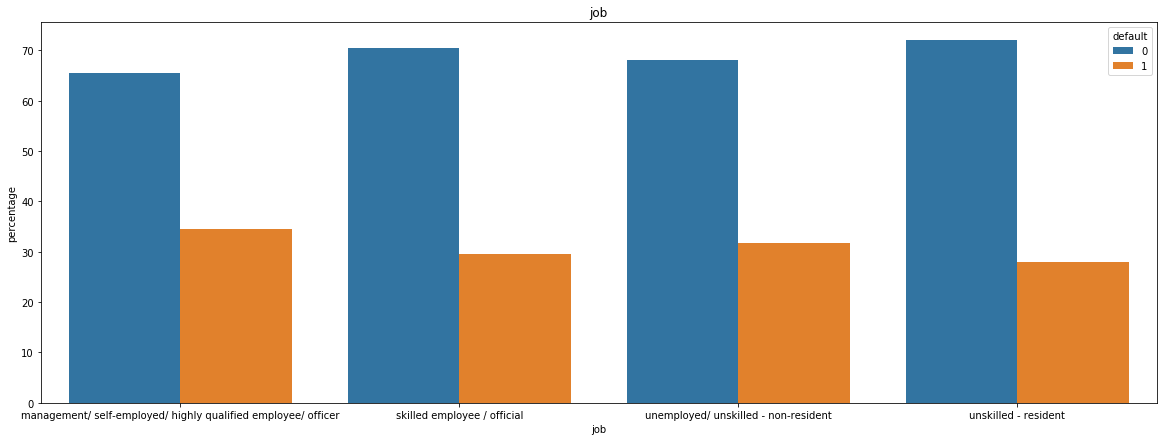

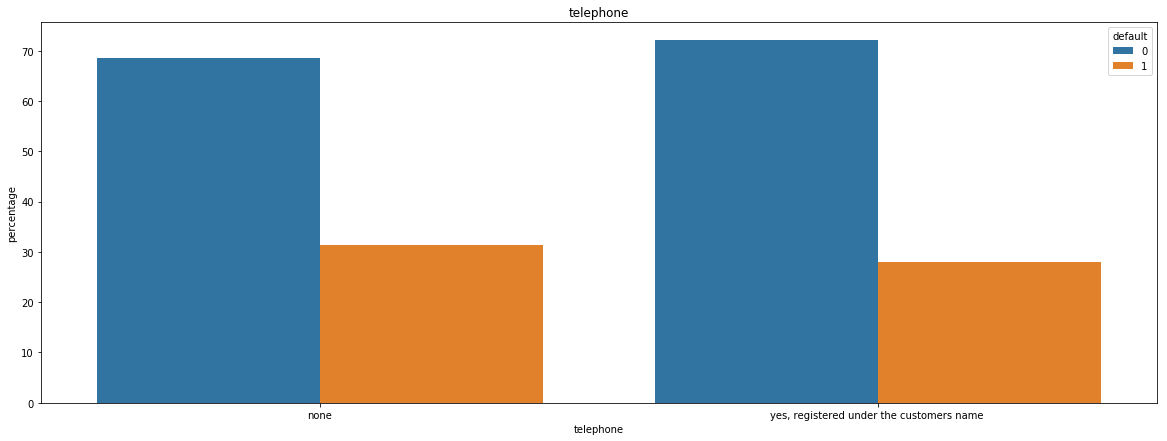

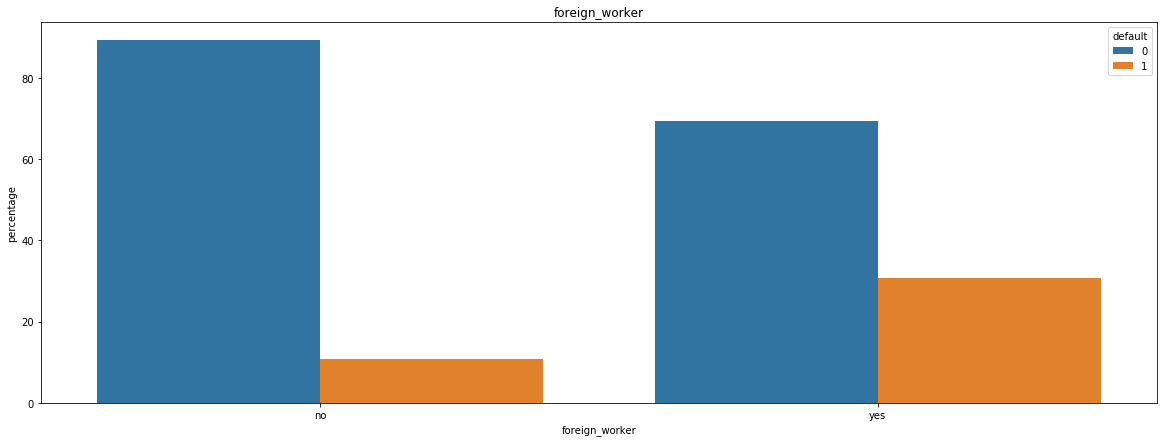

In [ ]:
for i in rates_list:
    plt.figure(figsize=(20,7))
    sns.barplot(x=i.iloc[:,0], y=i.iloc[:,2], hue=i.iloc[:,1])
    plt.title(i.columns[0])
    plt.show()

In [ ]:
data.personal_status_sex.value_counts()

male : single                          548
female : divorced/separated/married    310
male : married/widowed                  92
male : divorced/separated               50
Name: personal_status_sex, dtype: int64

In [ ]:
data.personal_status_sex=np.where(data.personal_status_sex=="female : divorced/separated/married", "Female","Male")

In [ ]:
data.personal_status_sex.value_counts(normalize=True).mul(100).rename("Gender distribution in percentage")

Male      69.0
Female    31.0
Name: Gender distribution in percentage, dtype: float64

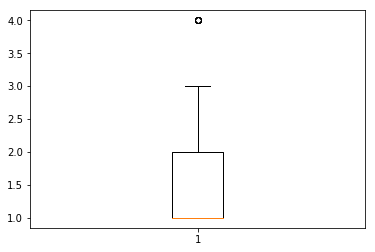

In [ ]:
plt.boxplot(data.credits_this_bank)
plt.show()

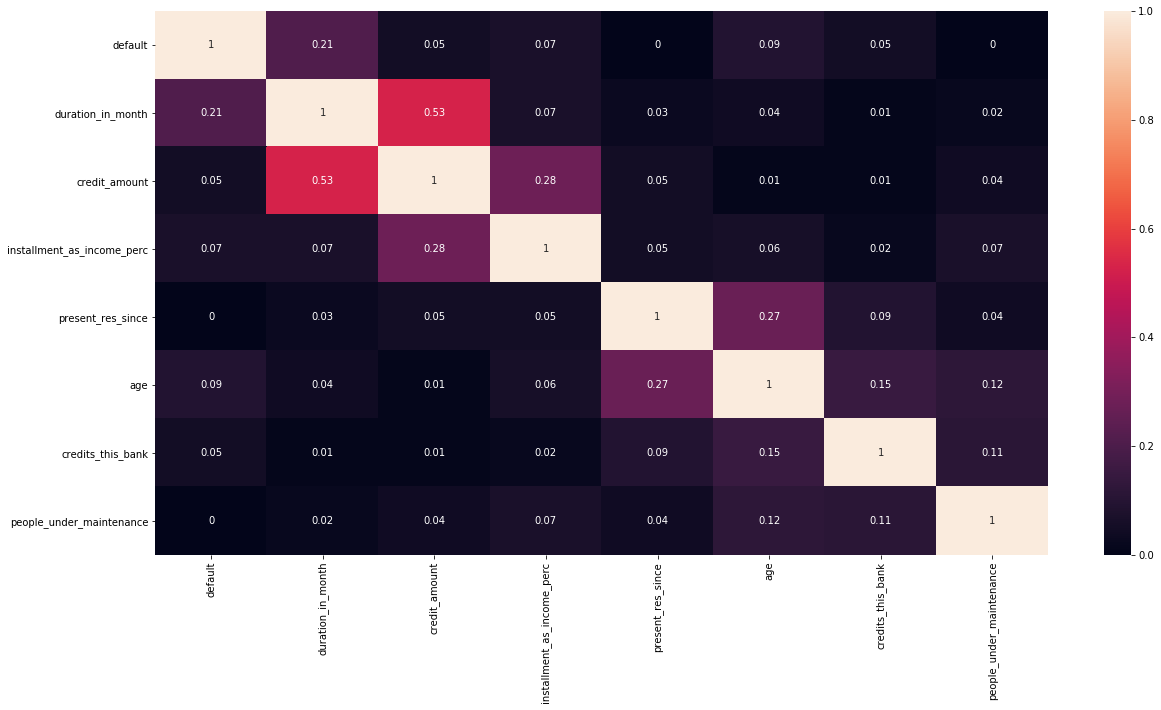

In [ ]:
#Let's see the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data.corr().abs().round(2),annot=True)
plt.show()

In [ ]:
#Let's create dummy variables 
data_dum=pd.get_dummies(data,drop_first=True)



In [ ]:
data_dum.shape

(1000, 47)

In [ ]:
#separating X and Y
Y=data_dum["default"]
X=data_dum.drop("default",axis=1)

#let's split X and Y data into test and train datasets, test data is 20% of overall data
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
#setting Logistic regression parameters range
param_logit={'class_weight':[None,'balanced'],
            'C':np.linspace(0.0001,5,100)}

In [ ]:
gridsearch_logit = GridSearchCV(estimator=LogisticRegression(random_state=42),
                        param_grid=param_logit,
                        cv=5,scoring='roc_auc',verbose=1,n_jobs=2)
gridsearch_logit.fit(X0,Y0)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   25.1s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:   36.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'class_weight': [None, 'balanced'], 'C': array([1.0000e-04, 5.0604e-02, ..., 4.9495e+00, 5.0000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [ ]:
#best params for logit
gridsearch_logit.best_params_

{'C': 0.1516121212121212, 'class_weight': None}

In [ ]:
logit=LogisticRegression(class_weight=None,C=0.1516121212121212,random_state=42).fit(X0,Y0)

In [ ]:
Y0_logit=logit.predict_proba(X0)[:,1]
Y1_logit=logit.predict_proba(X1)[:,1]

In [ ]:
print("ROC_AUC Train not scaled Logit:",roc_auc_score(Y0,Y0_logit).round(2))
print("ROC_AUC Test not scaled Logit:",roc_auc_score(Y1,Y1_logit).round(2))
print("Mean 5-fold ROC AUC score for not scaled logit:",np.mean(cross_val_score(estimator=logit, X=X,y=Y,cv=5, scoring="roc_auc").round(2)))

ROC_AUC Train not scaled Logit: 0.81
ROC_AUC Test not scaled Logit: 0.8
Mean 5-fold ROC AUC score for not scaled logit: 0.784


In [ ]:
#setting up the ranges for hyperparameters
param_dt={"max_depth":range(5,16),"min_samples_leaf":range(10,125,5),
          "class_weight":["balanced", None],}

In [ ]:
gs_dt=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   param_grid=param_dt,scoring="roc_auc",cv=5, verbose=1)
gs_dt.fit(X0,Y0)

Fitting 5 folds for each of 506 candidates, totalling 2530 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2530 out of 2530 | elapsed:   47.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 16), 'min_samples_leaf': range(10, 125, 5), 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [ ]:
gs_dt.best_params_

{'class_weight': 'balanced', 'max_depth': 6, 'min_samples_leaf': 30}

In [ ]:
#fitting the model with best parameters
dt_grid=DecisionTreeClassifier(class_weight="balanced",max_depth=6,
                             min_samples_leaf=30, random_state=42).fit(X0,Y0)

#getting probabilities
Y0_dt_grid=dt_grid.predict_proba(X0)[:,1]
Y1_dt_grid=dt_grid.predict_proba(X1)[:,1]

In [ ]:
#calculating roc auc score 
print("ROC_AUC Train for Decision Tree:",roc_auc_score(Y0,Y0_dt_grid).round(2))
print("ROC_AUC Test for Decision Tree:",roc_auc_score(Y1,Y1_dt_grid).round(2))
print("Mean 5-fold ROC AUC score for Decision Tree:",np.mean(cross_val_score(estimator=dt_grid, X=X,y=Y,cv=5, scoring="roc_auc")).round(2))

ROC_AUC Train for Decision Tree: 0.8
ROC_AUC Test for Decision Tree: 0.76
Mean 5-fold ROC AUC score for Decision Tree: 0.74


In [ ]:
model=Logit(Y0,X0)
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.460462
         Iterations 7


In [ ]:
results.pred_table().T

array([[497., 114.],
       [ 62., 127.]])

In [ ]:
#Overall Accuracy, Specificity and Recall
Accuracy=(497+127)/(497+114+62+127)
Specificity=497/(497+62)
Recall=127/(127+114)
print("Accuracy for logistic:", Accuracy)
print("Specificity for logistic:", Specificity)
print("Recall or logistic:", Recall)

Accuracy for logistic: 0.78
Specificity for logistic: 0.889087656529517
Recall or logistic: 0.5269709543568465


In [ ]:
#property returning feature importances as array
dt_grid.feature_importances_

array([0.20968082, 0.        , 0.00882335, 0.        , 0.093558  ,
       0.        , 0.        , 0.        , 0.        , 0.40877158,
       0.05012572, 0.        , 0.        , 0.        , 0.        ,
       0.02520242, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03570259, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04869689, 0.        , 0.08971698, 0.        , 0.        ,
       0.        , 0.02972164, 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
#making a dataframe for convenient usage
feat_imp=pd.DataFrame(dt_grid.feature_importances_,index=X.columns,
                      columns=["Feature_imp"])
feat_imp=feat_imp.sort_values(by="Feature_imp",ascending=False)
feat_imp.head(10)

,Feature_imp
account_check_status_no checking account,0.408772
duration_in_month,0.209681
age,0.093558
other_installment_plans_none,0.089717
credit_history_critical account/ other credits existing (not at this bank),0.050126
property_real estate,0.048697
savings_unknown/ no savings account,0.035703
job_skilled employee / official,0.029722
purpose_car (new),0.025202
installment_as_income_perc,0.008823


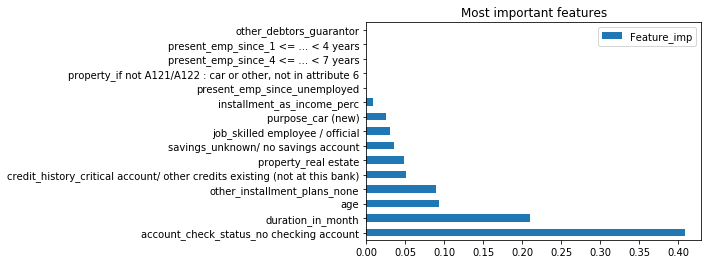

In [ ]:
#visualizing feature importances
feat_imp.head(15).plot.barh()
plt.title("Most important features")
plt.show()

In [ ]:
data.columns.to_list()

['default',
 'account_check_status',
 'duration_in_month',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings',
 'present_emp_since',
 'installment_as_income_perc',
 'personal_status_sex',
 'other_debtors',
 'present_res_since',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'credits_this_bank',
 'job',
 'people_under_maintenance',
 'telephone',
 'foreign_worker']

In [ ]:
#setting rf param grid
param_rf={  'max_depth': range(4,16),
            'min_samples_leaf': range(1,100, 5),
             'class_weight': ['balanced', None] }

In [ ]:
gs_rf=GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_grid=param_rf,cv=5, scoring="roc_auc", verbose=1)
gs_rf.fit(X0,Y0)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(4, 16), 'min_samples_leaf': range(1, 100, 5), 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [ ]:
gs_rf.best_params_

{'class_weight': None, 'max_depth': 6, 'min_samples_leaf': 6}

In [ ]:
#fitting the model with best parameters
rf=RandomForestClassifier(random_state=42,class_weight=None,max_depth=6,min_samples_leaf=6).fit(X0,Y0)

#getting probabilities
Y0_rf=rf.predict_proba(X0)[:,1]
Y1_rf=rf.predict_proba(X1)[:,1]

In [ ]:
#calculating roc auc score 
print("ROC_AUC Train for Random Forest:",roc_auc_score(Y0,Y0_rf).round(2))
print("ROC_AUC Test for Random Forest:",roc_auc_score(Y1,Y1_rf).round(2))
#Mean cross val score for model with default hyperparameters
print("Mean 5-fold ROC AUC score for Random Forest:",np.mean(cross_val_score(estimator=rf, X=X,y=Y,cv=5, scoring="roc_auc",)).round(2))

ROC_AUC Train for Random Forest: 0.86
ROC_AUC Test for Random Forest: 0.76
Mean 5-fold ROC AUC score for Random Forest: 0.76


In [ ]:
#gradient boosting doesn't have "class_weight" parameter, so setting new parameters dictionary
param_gb={'max_depth': range(4, 11),
          'min_samples_leaf': range(10, 140, 10),
         'n_estimators':range(200,320,20)}

In [ ]:
gs_gb=GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),param_grid=param_gb,
                   cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
gs_gb.fit(X0,Y0)

Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.8s


KeyboardInterrupt: 

In [ ]:
gs_gb.best_params_

In [ ]:
#fitting the model with best parameters
gb=GradientBoostingClassifier(random_state=42,max_depth=6,min_samples_leaf=20, n_estimators=200).fit(X0,Y0)
#getting probabilities
Y0_gb=gb.predict_proba(X0)[:,1]
Y1_gb=gb.predict_proba(X1)[:,1]

In [ ]:
#calculating roc auc score 
print("ROC_AUC Train for Tuned Gradient Boosting:",roc_auc_score(Y0,Y0_gb).round(2))
print("ROC_AUC Test for Tuned Gradinet Boosting:",roc_auc_score(Y1,Y1_gb).round(2))
#Mean cross val score for model with default hyperparameters
print("Mean 5-fold ROC AUC score for Gradinet Boosting Tuned hyperparameters:",np.mean(cross_val_score(estimator=gb, X=X,y=Y,cv=5, scoring="roc_auc",)).round(2))

In [ ]:
print("Mean 5-fold ROC AUC score for not scaled LOGIT:",np.mean(cross_val_score(estimator=logit, X=X,y=Y,cv=5, scoring="roc_auc")).round(2))
print("Mean 5-fold ROC AUC score for DT Tuned hyperparameters:",np.mean(cross_val_score(estimator=dt_grid, X=X,y=Y,cv=5, scoring="roc_auc")).round(2))
print("Mean 5-fold ROC AUC score for Random Forest Tuned hyperparameters:",np.mean(cross_val_score(estimator=rf, X=X,y=Y,cv=5, scoring="roc_auc",)).round(2))
print("Mean 5-fold ROC AUC score for Gradinet Boosting Tuned hyperparameters:",np.mean(cross_val_score(estimator=gb, X=X,y=Y,cv=5, scoring="roc_auc",)).round(2))

Mean 5-fold ROC AUC score for not scaled LOGIT: 0.78
Mean 5-fold ROC AUC score for DT Tuned hyperparameters: 0.74
Mean 5-fold ROC AUC score for Random Forest Tuned hyperparameters: 0.76


NameError: name 'gb' is not defined